In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb

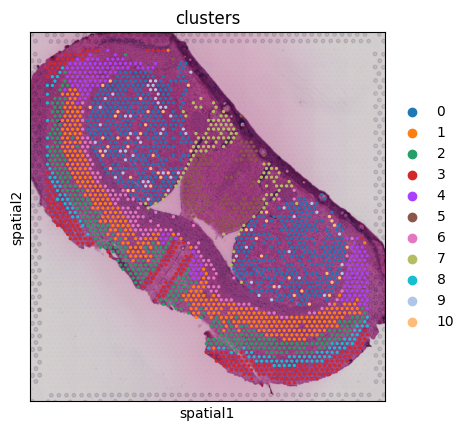

In [7]:
adata = sc.read_h5ad("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m3\\m3_visium_ctrl.h5ad")
adata.obs["leiden"] = adata.obs["clusters"]
adata.obs["clusters"] = adata.obs["leiden"]
sc.pl.spatial(adata, img_key = "hires", color="clusters")

In [8]:
adata

AnnData object with n_obs × n_vars = 2239 × 15249
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'n_genes', 'clusters', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
color_mapping = {
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'yellow',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'pink',
    8: 'gray',
    9: 'cyan',
    10: 'black',
    11: 'white',
    12: 'magenta',
    13:'magenta',
     14:'magenta',
}

In [30]:
n = 2000  # 要选择的细胞数量
m = 5000   # 要选择的基因数量

# 随机选择n个细胞和m个基因
selected_cells = np.random.choice(adata.obs_names, size=n, replace=False)
selected_genes = np.random.choice(adata.var_names, size=m, replace=False)
# 创建新的AnnData对象
new_adata1 = adata[selected_cells, :][:, selected_genes[0:2500]]
#selected_cells = np.random.choice(adata.obs_names, size=n, replace=False)
new_adata2 = adata[selected_cells, :][:, selected_genes[2501:5000]]
# 打印新的AnnData对象的维度以验证
print(new_adata1.shape)
#sc.pl.spatial(new_adata1, img_key = "hires", color="clusters",alpha_img=0)
#sc.pl.spatial(new_adata2, img_key = "hires", color="clusters",alpha_img=0)

(2000, 2500)


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import geometric_transform
def apply_transformation(coordinates, transformation_matrix):
    """
    对齐次坐标应用几何变换
    """
    transformed_coordinates = np.dot(coordinates, transformation_matrix.T)
    return transformed_coordinates

# 旋转矩阵（45度）
theta = np.radians(np.random.uniform(-10, 10))
cos, sin = np.cos(theta), np.sin(theta)
rotation_matrix = np.array([
    [cos, -sin, 0],
    [sin, cos, 0],
    [0, 0, 1]
])

# 缩放矩阵
scale_factor = np.random.uniform(0.9, 1.1)
scaling_matrix = np.array([
    [scale_factor, 0, 0],
    [0, scale_factor, 0],
    [0, 0, 1]
])

# 平移矩阵
translate_x = np.random.uniform(-10, 10)
translate_y = np.random.uniform(-10, 10)
translation_matrix = np.array([
    [1, 0, translate_x],
    [0, 1, translate_y],
    [0, 0, 1]
])

shear_factor = np.random.uniform(0.9, 1.1)
shear_matrix = np.array([
    [1, shear_factor - 1, 0],
    [shear_factor - 1, 1, 0],
    [0, 0, 1]
])


# 组合变换矩阵
transformation_matrix = np.dot(np.dot(translation_matrix, scaling_matrix), rotation_matrix)
transformation_matrix = np.dot(shear_matrix, transformation_matrix)

def random_nonlinear_transformation(coordinates, scale=10):
    """
    对坐标应用随机不均匀变换
    """
    x, y = coordinates.T
    random_shift_x = scale * (np.random.rand(*x.shape) - 0.5)
    random_shift_y = scale * (np.random.rand(*y.shape) - 0.5)
    new_x = x + random_shift_x
    new_y = y + random_shift_y
    return np.vstack([new_x, new_y]).T


def to_grid(points, grid_size):
    """
    将点集转换为等距点阵
    
    参数:
        points: List[Tuple[float, float]] - 原始点坐标列表
        grid_size: float - 网格大小(相邻点间距)
    
    返回:
        List[Tuple[float, float]] - 网格对齐后的点坐标列表
    """
    grid_points = []
    for x, y in points:
        grid_x = round(x / grid_size) * grid_size
        grid_y = round(y / grid_size) * grid_size
        grid_points.append((grid_x, grid_y))
    return grid_points

# 示例用法
#points = [(1.2, 3.7), (5.1, 2.9), (7.8, 4.2)]
#grid_points = to_grid(points, grid_size=1.0)
#print(grid_points)  # [(1.0, 4.0), (5.0, 3.0), (8.0, 4.0)]

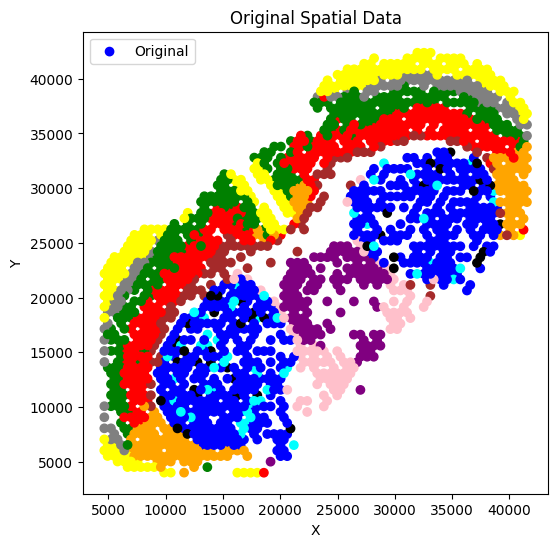

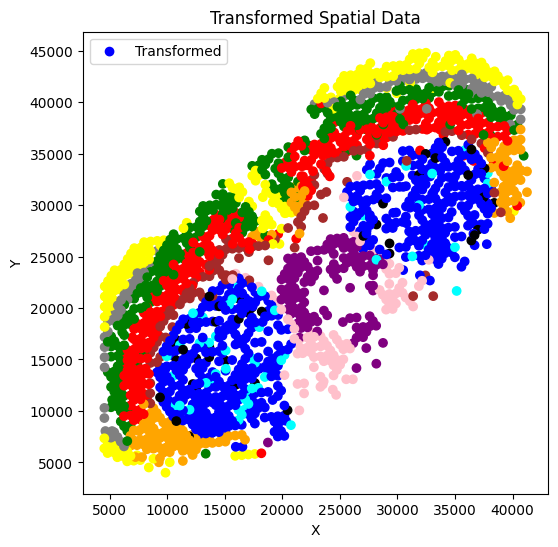

C:\Users\28123\AppData\Local\Temp\ipykernel_3880\236285705.py:48: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  new_adata1.obs['spatialX'] = spatial_data[:, 0]


In [32]:
#partial tansfer
# 原始数据
spatial_data =new_adata1.obsm['spatial'].copy()
plt.figure(figsize=(6, 6))
plt.scatter(spatial_data[:, 0], spatial_data[:, 1], c=[color_mapping[category] for category in new_adata1.obs["clusters"].astype(int).tolist()], label='Original')
plt.title('Original Spatial Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
# 提取空间数据
# 重复n次
n=1
for _ in range(n):
    # 随机选择部分样本进行变换
    sample_indices = np.random.choice(spatial_data.shape[0], size=int(spatial_data.shape[0] *0.9), replace=False)
    
    # 获取选中的样本
    sample_coords = spatial_data[sample_indices]
    
    # 添加齐次坐标
    homogeneous_sample_coords = np.hstack([sample_coords, np.ones((sample_coords.shape[0], 1))])
    
    # 应用线性变换
    transformed_sample_coords = apply_transformation(homogeneous_sample_coords, transformation_matrix)
    transformed_sample_coords = transformed_sample_coords[:, :2]
    
    # 应用非线性变换
    transformed_sample_coords = random_nonlinear_transformation(transformed_sample_coords)
    # 转化为等距点阵图
    transformed_sample_coords = to_grid(transformed_sample_coords, grid_size=1.0)
    # 更新选中样本的空间数据
    spatial_data[sample_indices] = transformed_sample_coords

# 打印变换后的空间数据

# 打印变换后的空间数据

# 变换后的数据
plt.figure(figsize=(6, 6))
plt.scatter(spatial_data[:, 0], spatial_data[:, 1], c=[color_mapping[category] for category in new_adata1.obs["clusters"].astype(int).tolist()], label='Transformed')
plt.title('Transformed Spatial Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()
new_adata1.obs['spatialX'] = spatial_data[:, 0]
new_adata1.obs['spatialY'] = spatial_data[:, 1]
new_adata1.obsm['spatial'] = spatial_data

In [ ]:
######all transter 
###### 
spatial_data = new_adata1.obsm['spatial']

# 添加齐次坐标
homogeneous_coordinates = np.hstack([spatial_data, np.ones((spatial_data.shape[0], 1))])

# 应用变换
transformed_coordinates = apply_transformation(homogeneous_coordinates, transformation_matrix)
transformed_coordinates = transformed_coordinates[:, :2]
transformed_coordinates = random_nonlinear_transformation(transformed_coordinates)

# 更新空间数据
new_adata1.obsm['spatial'] = transformed_coordinates
plt.figure(figsize=(6, 6))
plt.scatter(transformed_coordinates[:, 0], transformed_coordinates[:, 1], c=[color_mapping[category] for category in new_adata1.obs["clusters"].astype(int).tolist()], label='Transformed')
plt.title('Transformed Spatial Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()


In [ ]:
spatial_data[:, 0]

In [33]:
new_adata1.write("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\benchmark\\m3\\O1.h5ad")
new_adata2.write("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\benchmark\\m3\\O2.h5ad")